# EDA To Prediction (DieTanic)

타이타닉 호의 침몰은 역사상 가장 악명 높은 난파선 중 하나입니다.
1912 년 4 월 15 일, 첫 항해 중에 타이타닉 호는 빙산과 충돌 한 후 침몰하여 2224 명의 승객과 승무원 중 1502 명이 사망했습니다.
그래서 이름이 DieTanic입니다. 이것은 세상 어느 누구도 잊을 수없는 매우 잊을 수없는 재앙입니다.

타이타닉을 만드는 데 약 750 만 달러가 걸렸고 충돌로 인해 바다 밑으로 가라 앉았습니다.
Titanic 데이터 세트는 초보자가 데이터 과학의 여정을 시작하고 Kaggle 대회에 참여할 수있는 매우 좋은 데이터 세트입니다.

이 노트북의 목표는 예측 모델링 문제에서 작업흐름이 어떤지에 대한 아이디어를 제공하는 것입니다.
특징을 확인하고 새로운 특징 및 일부 머신러닝개념을 추가하는 방법.
초보자도 노트북의 모든 단계를 이해할 수 있도록 노트북을 최대한 기본으로 유지하려고 노력했습니다.

노트북이 마음에 들고 도움이되었다고 생각한다면 UPVOTE 해주세요.
저에게 동기부여가 됩니다.

### Contents of the Notebook:
#### Part 1: 탐색적 자료 분석(EDA):

1) 특징 분석

2) 다양한 특징을 고려한 관계나 동향 파악

#### Part 2: 피쳐 엔지니어링 및 데이터 청소:

1) 몇 가지 피처 추가.

2) 불필요한 피처 제거.

3) 모델링에 적합한 형태로 피처 변환

#### Part 3: 예측 모델링

1) 기본 알고리즘 실행.

2) 교차 검증.

3) 앙상블.

4) 중요한 피처 추출.

## Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt #시각화 패키지
import seaborn as sns #시각화 패키지
plt.style.use('fivethirtyeight') # 테마바꾸기
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('../titanic/train.csv') 

In [6]:
data.head() # data 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.isnull().sum() # 전체 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**The Age, Cabin and Embarked**는 결측치가 있다. 나중에 처리함.

### How many Survived??

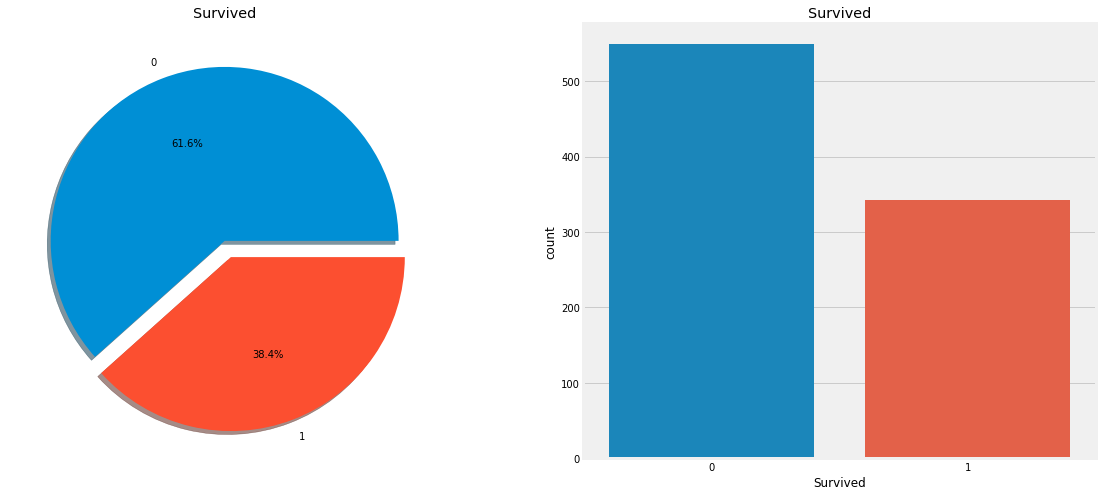

In [8]:
f,ax=plt.subplots(nrows=1, ncols=2, figsize=(18,8))
#한 번에 여러 그래프를 보여줌

# f란 figure로써 - 전체 subplot을 말한다.
# ex) 서브플롯안에 몇개의 그래프가 있던지 상관없이 전체 사이즈
# ax는 axe로써 - 전체 중 개별 그래프
# ex) 서브플롯 안에 2개(a1,a2)의 그래프가 있다면 a1, a2를 말함

data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# Survived 데이터 갯수를 세어 (value_counts()) 파이그래프로 나타냄

# plot.pie( # 파이그래프 함수
# explode=[0,0.1], # 조각 중 하나가 튀어나오는 정도 (두번째(1)에 대한 값이 0.1정도 떨어짐)
# autopct='%1.1f%%', # 비율을 표현할것인가 안할 것인가에 대한 여부(소숫점 첫째자리 및 퍼센트)
# ax=ax[0], # 첫번째 서브플롯에 그림
# shadow=False) #파이그래프의 그림자 유무

ax[0].set_title('Survived') # 첫 번째 그래프 제목
ax[0].set_ylabel('') # ylable은 공백
sns.countplot('Survived',data=data,ax=ax[1])
# 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

ax[1].set_title('Survived') # 두 번째 그래프 제목
plt.show()

사고에서 살아남은 승객은 많지 않은 것이 분명합니다.

훈련 세트에있는 891 명의 승객 중 약 350 명이 살아 남았습니다.
즉 전체 훈련 세트의 **38.4%** 만이 충돌에서 살아 남았습니다.
데이터에서 더 나은 통찰력을 얻고 어떤 범주의 승객이 살아남 았는지,
누가 그렇지 않았는지 확인하려면 더 많이 파헤쳐야합니다.

데이터 세트의 다양한 피처를 사용하여 생존율을 확인하려고합니다.
일부 피처는 성별, 출국 항, 나이 등입니다.

먼저 다양한 유형의 피처를 이해하겠습니다.

## Types Of Features
### Categorical Features:
범주형 변수는 범주가 두 개 이상이고 해당 피처의 각 값을 범주별로 분류 할 수있는 변수입니다.
예를 들어 성별은 두 범주(남성 및 여성)를 갖는 범주형 변수입니다.
이제 우리는 그러한 변수를 정렬하거나 순서를 지정할 수 없습니다.
명목형 변수라고도 합니다.

**데이터 세트의 범주적 특징 : Sex, Embarked.**
### Ordinal Features:
서열형 변수는 범주형 값과 비슷하지만 값 사이에 상대적인 순서 나 정렬이 가능하다는 차이점이 있습니다.
예를 들어 : Tall, Medium, Short 값이있는 Height와 같은 피처가 있는 경우 Height는 서열 변수입니다.
여기서 우리는 변수에 따라 상대으로 정렬할 수 있습니다.

**데이터 세트의 서열 특징 : PClass**

### Continous Feature:
두 지점 사이 또는 특성 열의 최소값 또는 최대 값 사이의 값을 가질 수 있는 특성은 연속적이라고합니다.

**데이터 세트의 연속형 특징 : Age**

## Analysing The Features
### Sex--> Categorical Feature

In [9]:
data.groupby(['Sex','Survived'])['Survived'].count()
# data를 groupby() 함수로 'Sex','Survived' 변수를 묶은 후 Survived을 count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

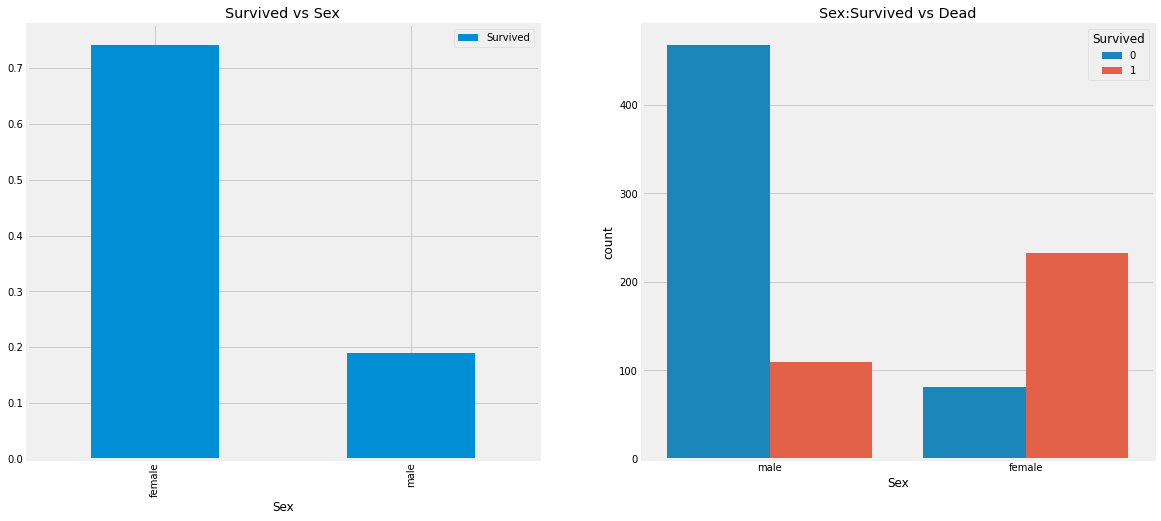

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
# data에서 'Sex','Survived' 변수만 추출 후 groupby()로 'Sex' 기준으로 묶어 평균을 막대그래프로 나타냄

ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
# hue='Survived' Survived를 기준으로 범주를 나눔

ax[1].set_title('Sex:Survived vs Dead')
plt.show()

흥미로워 보입니다. 배에 탄 남성의 수는 여성의 수보다 훨씬 많습니다.
그럼에도 불구하고 생존 여성의 수는 생존 남성의 거의 두 배입니다.
배에 탄 여성의 생존율은 약 75 %이고 남성은 약 18-19 %입니다.

이것은 모델링에 있어 매우 중요한 특징으로 보입니다.
하지만 최고인가?? 다른 특징을 확인해 보겠습니다.

### Pclass --> Ordinal Feature

In [11]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')
# pd.crosstab( # 범주형 요인별로 교차분석해서, 행, 열 요인 기준 별로 빈도를 세어서 도수분포표, 교차표를 만들어줌
# data.Pclass,data.Survived, # 행(Pclass), 열(Survived)
# margins=True) # 합친 전체 데이터 나타냄
# .style.background_gradient(cmap='summer_r') # 각 열의 데이터에 따라 그라데이션의 배경 색상을 지정함 (matplotlib 필요/주피터노트북에 사용)


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


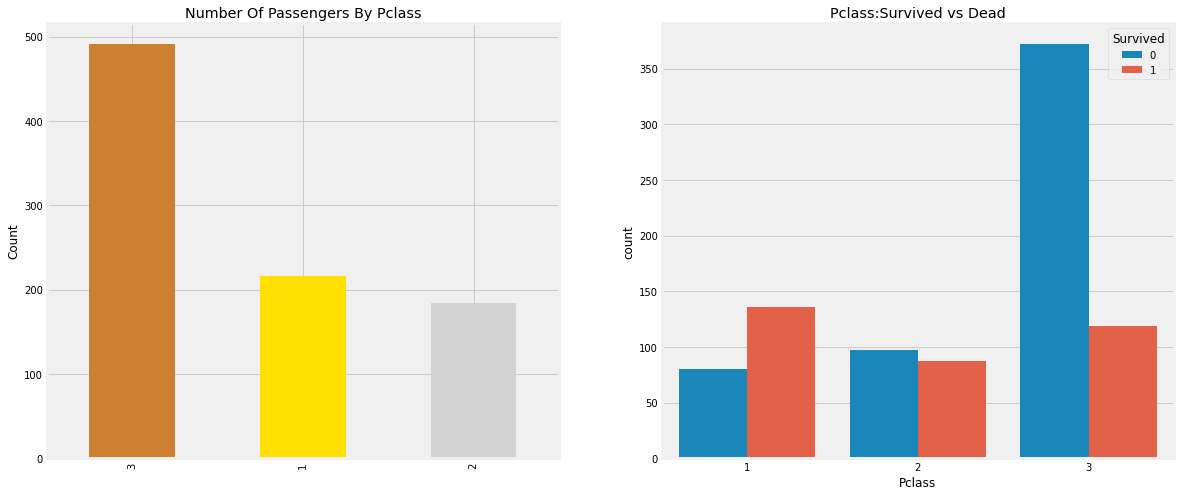

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
#color=['#CD7F32','#FFDF00','#D3D3D3'] # 순서대로 주황, 노랑, 회색

ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 돈으로 모든 것을 살 수 없다고 말합니다.
그러나 우리는 Pclass 1의 Passenegers가 구조에 매우 높은 우선 순위를 부여 받았다는 것을 분명히 알 수 있습니다.
Pclass 3의 승객 수가 훨씬 많았지만 여전히 생존율은 약 25%로 매우 낮습니다.

Pclass 1의 경우 생존율은 약 63 %이고 Pclass2의 경우 약 48 %입니다.
따라서 돈과 지위가 중요합니다. 완전 물질만능주의 세상이다.

조금 더 들어가서 다른 흥미로운 관찰을 확인합시다.
Sex와 Pclass Together로 생존율을 확인하세요.

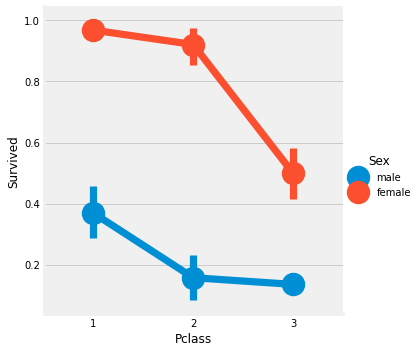

In [13]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
# factorplot()함수모양의 default는 kind=’strip’(스트립차트:긴 띠 모양의 용지를 사용하는 장기간 기록도[기록 장치])
plt.show()

이 경우 범주형 값을 쉽게 분리 할 수 있기 때문에 FactorPlot을 사용한다.

CrossTab과 FactorPlot을 보면 Pclass1의 여성 94 명 중 3 명만이 사망했기 때문에
Pclass1 여성의 생존율이 약 95-96 %임을 쉽게 추론 할 수 있습니다.

Pclass에 관계없이 구조하는 동안 여성에게 최우선 순위가 부여 된 것이 분명합니다.
Pclass1의 남성조차도 생존율이 매우 낮습니다.

Pclass도 중요한 피처인 것 같습니다.
다른 피처를 분석해 보겠습니다.

### Age--> Continous Feature

In [14]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')
# Age별 최댓값, 평균, 최솟값

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


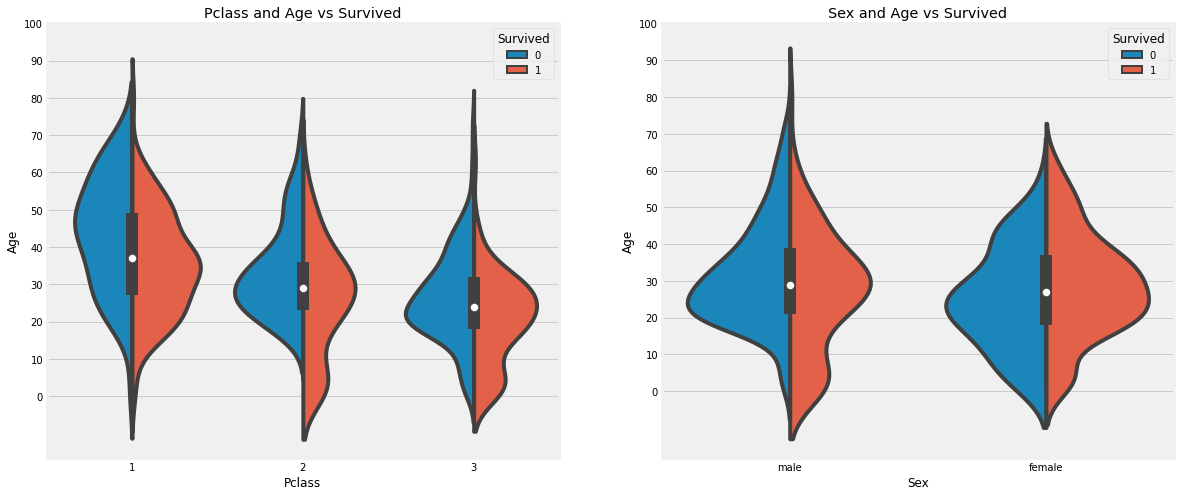

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
# sns.violinplot( # 바이올린 플롯/흰점 중앙값, 중앙 선은 사분위 범위 및 신뢰구간
# "Pclass","Age", hue="Survived", data=data,
# split=True, # 남여 그래프를 합침/False는 분할
# ax=ax[0])

ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10)) # y축 범위(기울기, 글자크기도 조정가능)
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Observations :
1) Pclass에 따라 어린이의 수가 증가하고 10세 미만의 행인(즉, 어린이)의 생존율은
   Pclass에 관계없이 좋은 것으로 보입니다.

2) Passenegers의 생존 가능성은 Pclass1의 20-50세의 경우에 높고 여성의 경우에 더 낫습니다.

3) 남성의 경우 연령이 증가함에 따라 생존 확률이 감소합니다.

앞서 살펴본 것처럼 Age 특징에 177 개의 null 값이 있습니다.
이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 연령으로 부여할 수 있습니다.

하지만 문제는 다양한 연령대의 사람들이 많다는 것입니다.
우리는 4살짜리 아이에게 평균 나이 29세를 부여 할 순 없습니다.
승객이 어떤 연령대에 속하는지 알 수 있는 방법이 있습니까??

"What's In A Name??"---> Feature :p

In [16]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
# extract() : 배열속의 키값을 변수로 만들어주는 역할을 한다

자 여기 정규식을 사용하고 있습니다 :[A-Z a-z] +) .. 
그래서 그것이 하는 일은 A-Z 또는 a-z 사이에 있고 뒤에 .(점)이 오는 문자열을 찾는 것입니다.
그래서 우리는 이름에서 이니셜을 성공적으로 추출했습니다.

In [17]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


그래서 Miss를 나타내는 Mlle 또는 Mme와 같이 철자가 틀린 이니셜이 있습니다.
그것들을 Miss로 바꾸고 다른 값에 대해서도 같은 것으로 바꿀 것입니다.

In [19]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
# Initial값 대체

In [21]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials
# Initial값에 대한 나이 평균치

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [22]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46
# 각 나이 데이터가 없는 Initial에 평균치 나이 입력

In [23]:
data.Age.isnull().any() #So no null values left finally 
# 결측치 확인(False : 결측치 없음)
# any() 모든 값이 False여야 False값 출력
# all() 모든 값이 True여야 True값 출력

False

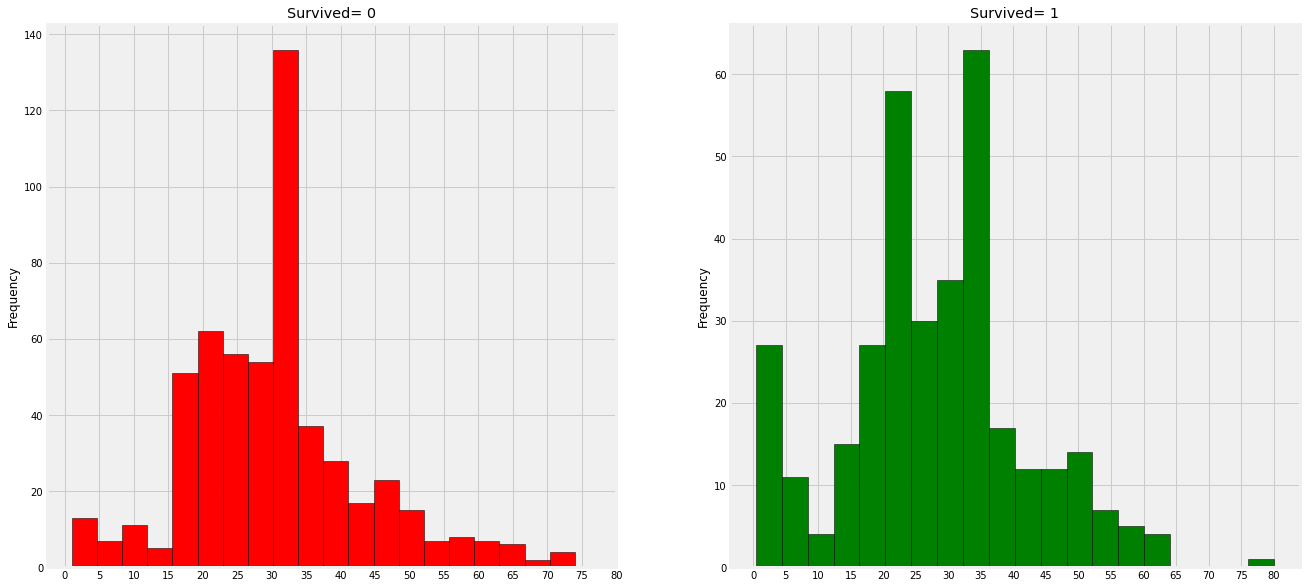

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
# data[data['Survived']==0].Age.plot.hist( # 사망자에 대한 연령별 히스토그램 작성
# ax=ax[0],
# bins=20, # 해당 막대 갯수 (80/20=4 : 막대의 가로 길이)
# edgecolor='black', # 선 색깔
# color='red') # 그래프 색깔

ax[0].set_title('Survived= 0') # 사망자 히스토그램
x1=list(range(0,85,5)) # x축 범위 지정
ax[0].set_xticks(x1) # 설정한 범위 x축에 설정
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1') # 생존자 히스토그램
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

#### Observations :
1) 유아(5세 미만)가 대량으로 구출되었습니다 (여성과 아동 우선 정책).

2) 가장 나이 많은 승객이 구해졌습니다 (80세).

3) 최대 사망자 수는 30-40 세였다.

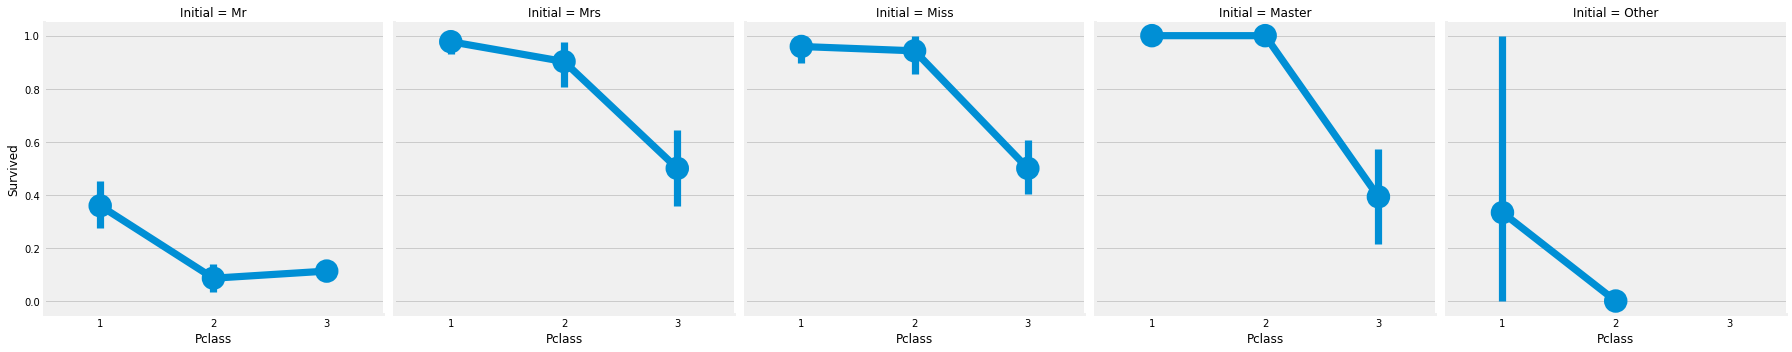

In [25]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

따라서 여성과 아동 우선 정책은 계급에 관계없이 유효합니다.

### Embarked--> Categorical Value

In [26]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')
# Embarked(탑승항구위치)

### Chances for Survival by Port Of Embarkation

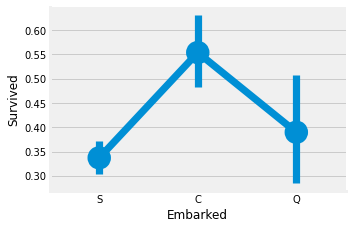

In [27]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf() # fig에 접근
fig.set_size_inches(5,3) # size 조절
plt.show()

C항구의 생존 가능성은 약 0.55으로 가장 높고 S항구의 경우 가장 낮습니다.

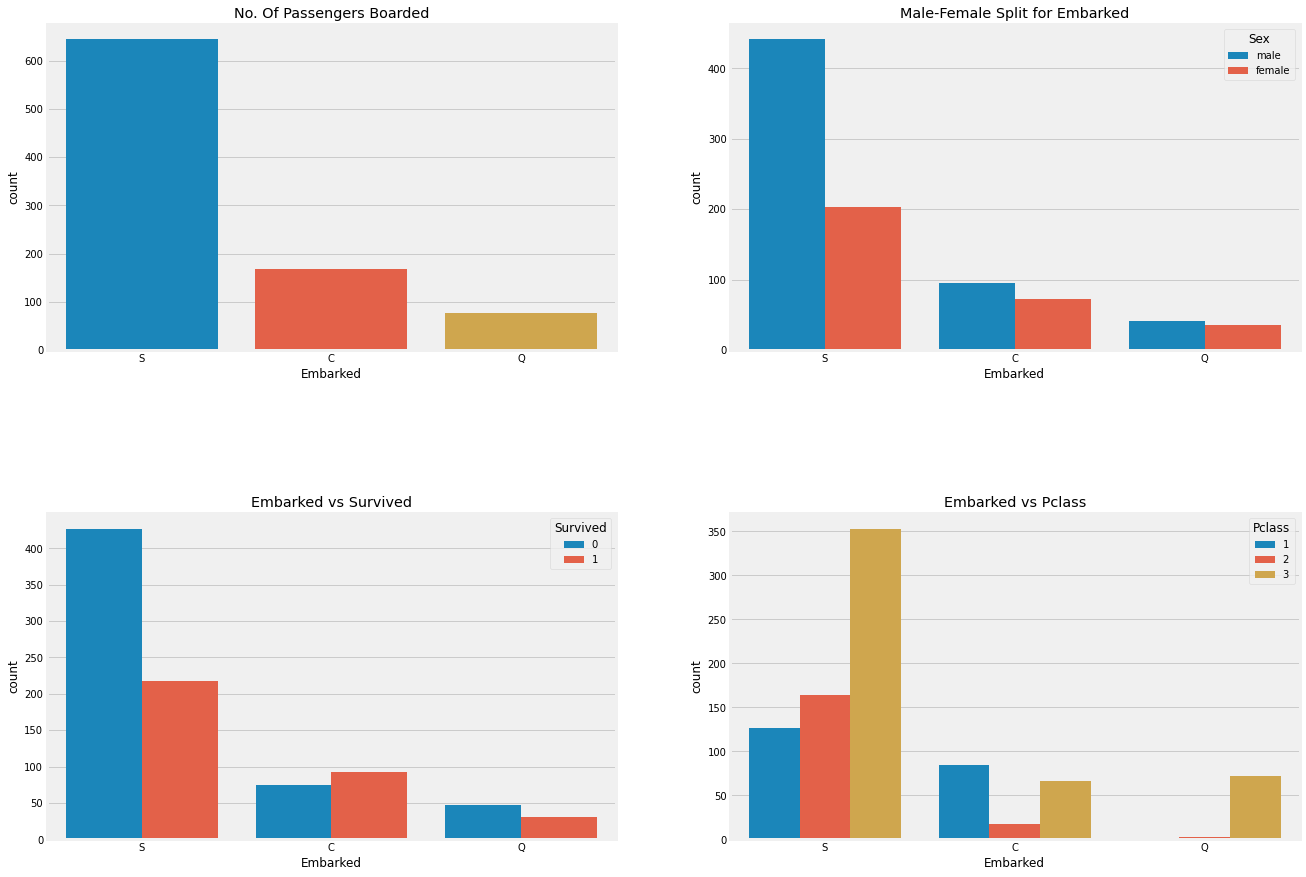

In [28]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
# plt.subplots_adjust( # 현재 베치되어 있는 subplot들의 위치를 조절
# wspace=0.2, # 좌우 그래프 간격
# hspace=0.5) # 상하 그래프 간격

plt.show()

#### Observations :
1) S에서 탑승한 승객이 최대. 대부분은 Pclass3입니다.

2) C에서 온 승객들은 다른 항의 생존율보단 좋은 비율을 보여 운이 좋은 것 같습니다.
   그 이유는 아마 모든 Pclass1 및 Pclass2 승객의 구조 때문일 수 있습니다.

3) Embark S는 대부분의 부자들이 탑승 한 항구로 보입니다.
   여전히 생존 가능성은 낮습니다.
   Pclass3의 많은 승객이 81 % 정도 생존하지 못했기 때문입니다.

4) 포트 Q는 승객의 거의 95 %가 Pclass3 출신이었습니다.

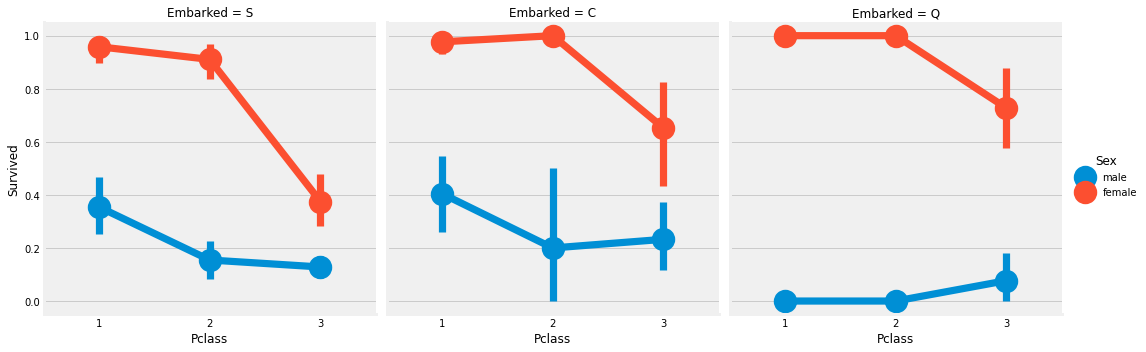

In [29]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

#### Observations :
1) Pclass에 관계없이 Pclass1과 Pclass2의 여성의 생존 확률은 거의 1입니다.

2) 포트 S는  Pclass3 Passenegers의 남성과 여성 모두 생존율이 매우 낮기 때문에 매우 불행한 것으로 보입니다. (돈 문제)

3) 포트 Q는 거의 모든 승객이 Pclass 3에서 왔기 때문에 남성들에게 가장 불행해 보입니다.

#### Embarked NaN 채우기
포트 S에서 탑승 한 최대 승객 수를 확인 했으므로 NaN을 S로 대체합니다.

In [30]:
data['Embarked'].fillna('S',inplace=True)
print(data.Embarked.isnull().any()) # Finally No NaN values

False


### SibSip-->Discrete
이 피처는 개인이 혼자인지 가족과 함께 있는지를 나타냅니다.
형제 자매 = 형제, 자매, 의붓 형제, 이복 누이
배우자 = 남편, 아내

In [31]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


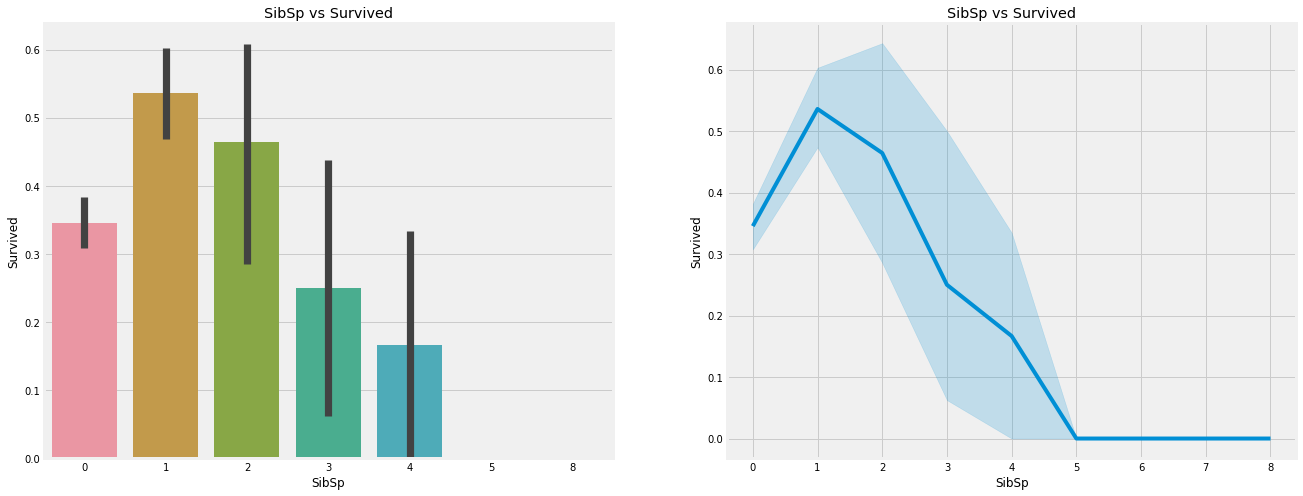

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.lineplot('SibSp','Survived',data=data,ax=ax[1])
# lineplot() 선그래프
# sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
# 원래 예제는 factorplot을 사용했지만 변수가 변경되었는지 ax입력이 되지않아 lineplot으로 변경하여 입력
ax[1].set_title('SibSp vs Survived')
# plt.close(2) # 창을 닫음
# plt.close(2) # lineplot을 사용하여 plt.close을 사용할 필요없음
plt.show()

In [33]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### Observations :
막대 그래프와 선 그림은 승객이 형제없이 혼자 탑승 할 경우 생존율이 34.5 %임을 보여줍니다.
형제 자매 수가 증가하면 그래프는 대략 감소합니다. 이것은 의미가 있습니다.
즉, 가족이 있다면 먼저 자신을 구하는 대신 가족들을 구하려고 노력할 것입니다.
놀랍게도 5-8 인 가족의 생존율은 0%입니다. 이유는 Pclass??

그 이유는 Pclass입니다. 교차 분석은 SibSp>3을 가진 사람들이 모두 Pclass3에 있음을 보여줍니다.
Pclass3 (> 3)의 모든 대가족이 사망에 처했다.


### Parch

In [34]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


교차 분석은 더 큰 가족이 Pclass3에 있음을 다시 보여줍니다.

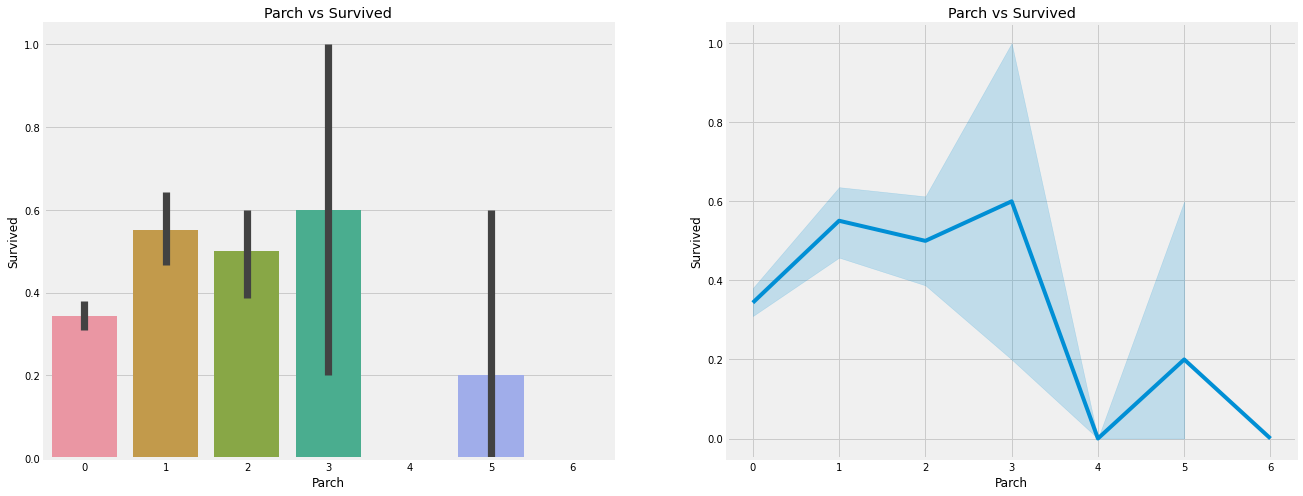

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.lineplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
# plt.cla() axes, 즉 현재 그림에서 현재 활성화 된 축을 지웁니다. 다른 축은 그대로 둡니다.
# plt.clf() 모든 축으로 현재 그림 전체를 지우지만 창을 열어두고 다른 플롯에 재사용 할 수 있습니다.
# plt.close() 달리 지정하지 않으면 현재 창이 될 window를 닫습니다.
plt.show()

#### Observatios :
여기에서도 결과는 매우 유사합니다.
부모와 함께 탑승한 승객은 생존 가능성이 더 높습니다.
그러나 가족 숫자가 증가함에 따라 감소합니다.

배에 1-3 명의 부모가 있는 사람에게는 생존 가능성이 좋습니다.
혼자있는 것은 치명적이며 누군가가 배에 4명 이상의 부모가 있을 때 생존 가능성이 줄어듭니다.

### Fare--> Continous Feature

In [36]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


최저 운임은 0.0입니다. 와!! 무료 호화로운 승차.

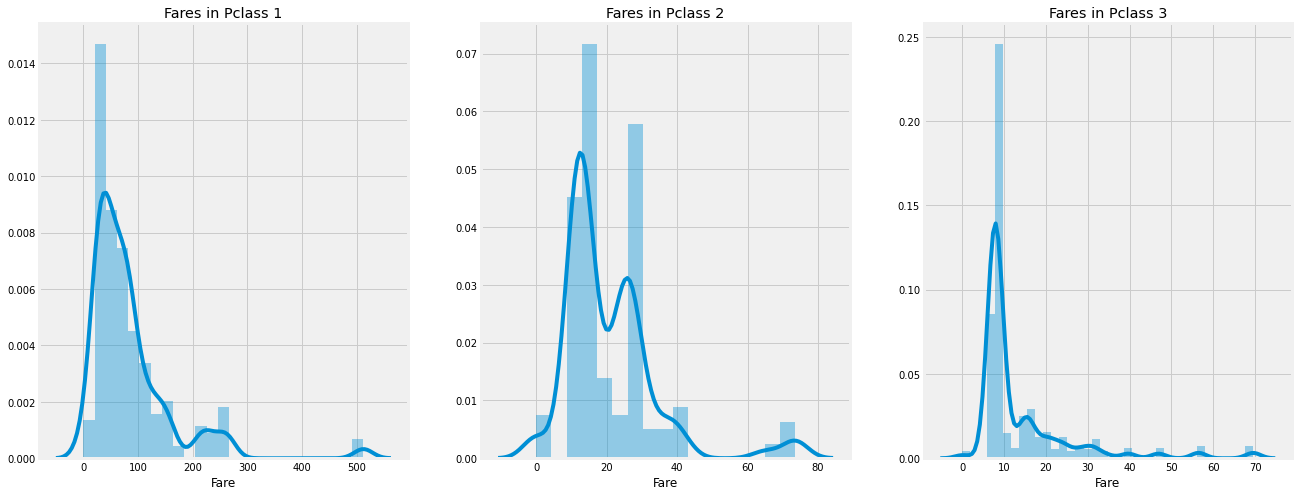

In [37]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
# sns.distplot( # 히스토그램 및 KDE(커널밀도추정)
# data[data['Pclass']==1].Fare, # Pclassrk 1인 데이터의 요금
# ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass1의 승객 요금에 큰 분포가 있는 것으로 보이며 이 분포는 기준(막대)가 감소함에 따라 계속 감소합니다.
이것도 연속적이므로 비닝(숫자형 변수를 범주형 변수로 변형)을 사용하여 이산으로 변환 할 수 있습니다.

### Observations in a Nutshell for all features:
    
**Sex** : 여성의 생존 확률이 남성에 비해 높습니다.

**Pclass** : 1등석 승객이 되는 것은 더 나은 생존 기회를 제공한다는 명백한 경향이 있습니다.
    Pclass3의 생존율은 매우 낮습니다.
    여성의 경우 Pclass1의 생존 확률은 거의 1이며 Pclass2의 생존 확률도 높습니다.
    돈이 이긴다 !!!

**Age** : 5-10 세 미만의 어린이는 생존 가능성이 높습니다.
    15세에서 35세 사이의 승객들이 많이 사망했습니다.

**Embarked** : 이것은 매우 흥미로운 특징입니다.
    C에서의 생존 가능성은 대부분의 Pclass1 승객이 S에서 승선했음에도 불구하고 더 나아 보입니다.
    Q의 승객은 모두 Pclass3 출신이었습니다.

**Parch + SibSp** : 1-2 명의 형제 자매, 배우자 또는 1-3 명의 부모가 있는 경우가
    혼자 있거나 대가족이 함께 여행하는 것보다 생존 확률이 더 높습니다.


### Correlation Between The Features

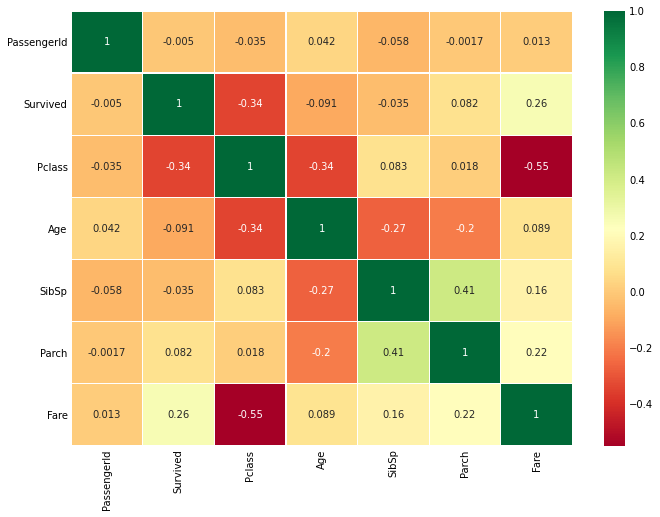

In [38]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
# sns.heatmap( # 히트맵 작성(색상으로 표현할 수 있는 다양한 정보를 일정한 이미지위에 열분포 형태의 비쥬얼한 그래픽으로 출력)
# data.corr(), # 데이터의 상관계수 사용
# annot=True,# 데이터 숫자 기입여부
# cmap='RdYlGn', # 색 설정
# linewidths=0.2) # 상자사이 간격 조정

fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
plt.show()

### 히트 맵 해석
가장 먼저 주목할 점은 알파벳이나 문자열 사이의 상관 관계를 알 수 없기 때문에 숫자 특성만 비교한다는 것입니다.
플롯을 이해하기 전에 정확한 상관 관계가 무엇인지 살펴 보겠습니다.

**양의 상관 관계** : 특징 A의 증가가 특징 B의 증가로 이어지는 경우 양의 상관 관계가 있습니다.
    값 1은 완벽한 양의 상관 관계를 의미합니다.

**음의 상관 관계** : 특징 A의 증가가 특징 B의 감소로 이어지는 경우 음의 상관 관계입니다.
    값 -1은 완벽한 음의 상관 관계를 의미합니다.

이제 두 특징이 매우 또는 완벽하게 상관 관계가 있으므로 한 기능이 증가하면 다른 기능이 증가한다고 가정해 보겠습니다.
이는 두 기능 모두 매우 유사한 정보를 포함하고 있으며 정보의 변동이 거의 또는 전혀 없음을 의미합니다.
둘 다 거의 동일한 정보를 포함하므로 이를 다중공선성이라고 합니다.

둘 중 하나가 중복되므로 둘 다 사용해야한다고 생각하십니까?
모델을 만들거나 훈련하는 동안 훈련 시간과 많은 이점을 줄이므로 중복 기능을 제거해야합니다.

이제 위의 히트맵에서 특징들이 크게 상관을 띄지 않음을 알 수 있습니다.
가장 높은 상관 관계는 SibSp와 Parch, 즉 0.41입니다.
그래서 우리는 모든 특징과 관계를 맺을 수 있습니다.

## Part2: Feature Engineering and Data Cleaning
이제 변수 가공이란 무엇입니까?

변수가 포함된 데이터 세트가 제공 될 때마다 모든 변수가 중요할 필요는 없습니다.
제거해야 할 중복 변수가 많이있을 수 있습니다.
또한 다른 변수에서 정보를 관찰하거나 추출하여 새로운 변수을 얻거나 추가 할 수 있습니다.

예를 들어 이름 변수을 사용하여 이니셜 변수을 가져 오는 것입니다.
새로운 변수를 얻고 몇 가지를 제거 할 수 있는지 살펴 보겠습니다.
또한 기존 관련 기능을 예측 모델링에 적합한 형태로 변환합니다.

### 연령대
#### 연령 특징 문제 :
나이는 연속적인 기능이라고 앞서 언급했듯이 기계 학습 모델의 연속 변수에는 문제가 있습니다.

예 : 스포츠인을 성별로 그룹화하거나 재배열하면 남성과 여성으로 쉽게 구분할 수 있습니다.

이제 나이를 기준으로 그룹화한다고하면 어떻게 하시겠습니까?
30명의 사람이있는 경우 30개의 연령 값이 있을 수 있습니다.
이제 이것은 문제가됩니다.

이러한 연속 값을 Binning 또는 Normalization을 통해 범주값으로 변환해야합니다.
비닝을 사용할 것입니다.
즉, 연령 범위를 단일 빈으로 그룹화하거나 단일 값을 할당합니다.

자, 승객의 최대 연령은 80세였습니다.
따라서 0-80의 범위를 5개의 빈으로 나눕니다.
따라서 80 / 5 = 16입니다.
따라서 크기 16의 빈입니다.

In [39]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)
# loc은 인덱스에서 특정 레이블의 행 (또는 열)을 가져옵니다.
# iloc은 인덱스에서 특정 위치의 행 (또는 열)을 가져옵니다. (따라서 정수만 필요)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [40]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band
# .to_frame() : 데이터 프레임 형태로 변환

,Age_band
1,382
2,325
0,104
3,69
4,11


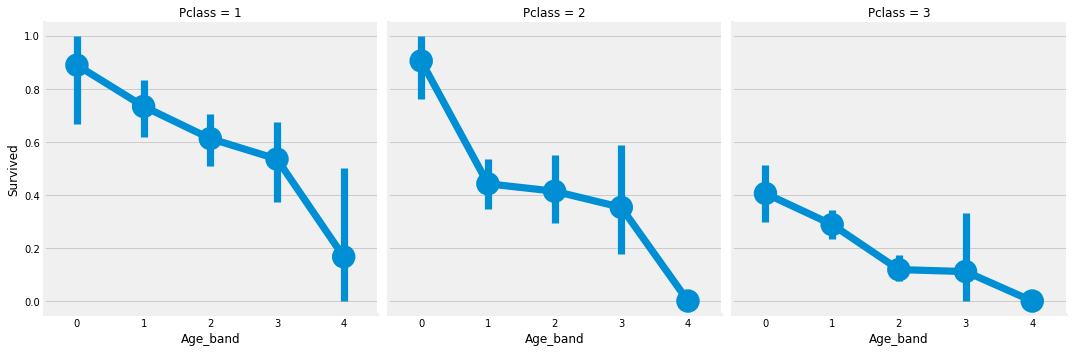

In [41]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

사실 .. Pclass에 관계없이 나이가 증가할수록 생존율이 감소합니다.

### Family_Size and Alone

이 시점에서 "Family_size" 및 "Alone"이라는 새 피쳐를 만들고 분석 할 수 있습니다.
이 피쳐는 Parch와 SibSp의 요약입니다.
생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공합니다.
Alone은 승객이 혼자인지 아닌지를 나타냅니다.

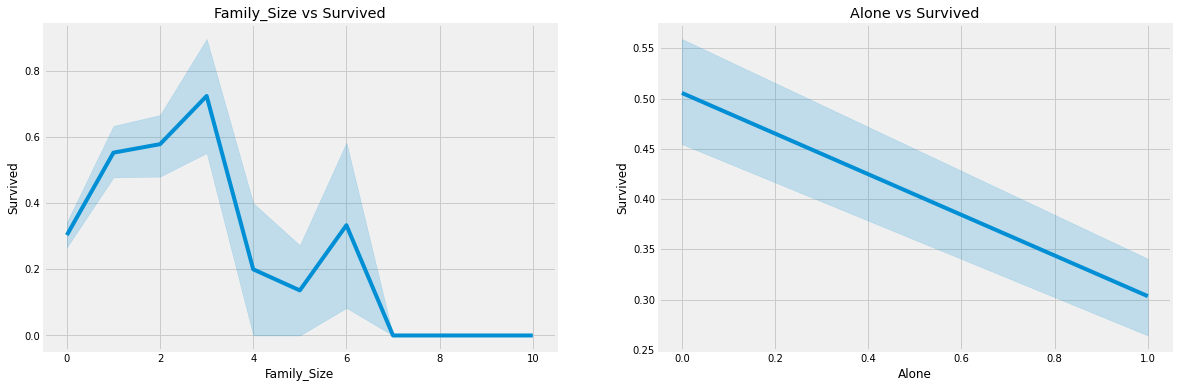

In [43]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp'] # family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1 # Alone
# Family_size=Parch+SibSp / Family_size=0 이면 Alone=1로 설정

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.lineplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.lineplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

**Family_Size = 0은 승객이 혼자임을 의미합니다.**
분명히 혼자이거나 family_size = 0이면 생존 가능성이 매우 낮습니다.
가족 수> 4 인 경우 기회도 감소합니다.
이것은 또한 모델의 중요한 기능으로 보입니다.
더 자세히 살펴 보겠습니다.

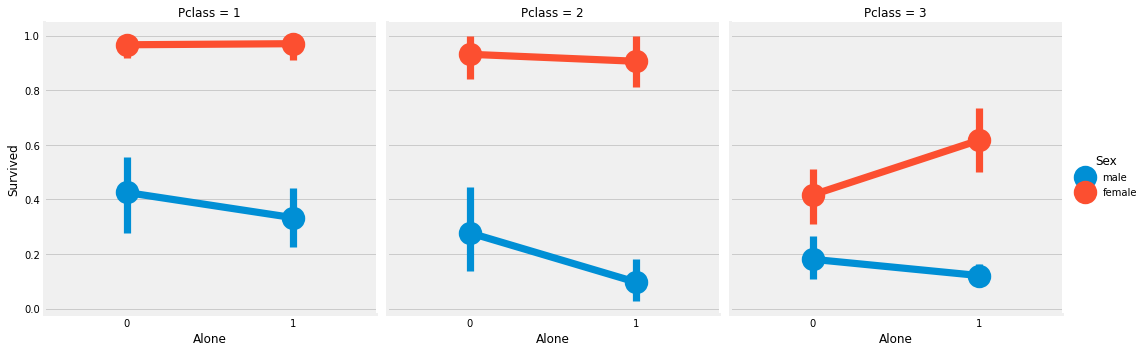

In [44]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

가족이 있는 여성보다 혼자인 여성의 생존 확률이 높은 Pclass3의 경우를 제외하고
혼자있는 것이 성별이나 Pclass에 관계없이 해롭다는 것을 알 수 있습니다.

### Fare_Range
요금은 또한 연속적인 변수이므로 이를 서수 값으로 변환해야합니다.
이를 위해 `pandas.qcut`을 사용합니다.

그래서 qcut이하는 일은 우리가 통과 한 빈의 수에 따라 값을 분할하거나 배열하는 것입니다.
따라서 5 개의 빈을 전달하면 5 개의 별도 빈 또는 값 범위에 균등 한 간격으로 값이 정렬됩니다.

In [45]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
# pd.qcut(data['Fare'],4) # 동일 갯수로 구간을 나눔 / pd.cut은 동일 길이로 나눔

data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 논의한 바와 같이, 우리는 fare_range가 증가할수록 생존 가능성이 증가한다는 것을 분명히 알 수 있습니다.

이제 Fare_Range 값을 그대로 전달할 수 없습니다.
Age_Band에서 했던 것과 같이 개체 값으로 변환해야합니다.

In [47]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

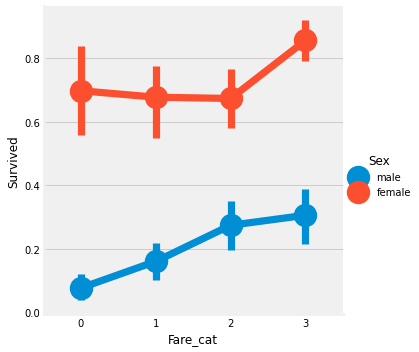

In [48]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

분명히 Fare_cat이 증가하면 생존 확률이 증가합니다.
이 기능은 성별과 함께 모델링하는 동안 중요한 특징이 될 수 있습니다.

### Converting String Values into Numeric
기계 학습 모델에 문자열을 입력할 수 없기 때문에 Sex과 Embarked, 등등과 같은 피쳐들을 숫자 값으로 변환해야합니다.

In [49]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

#### Dropping UnNeeded Features
**Name**-> 카테고리 값으로 변환 할 수 없으므로 이름 피쳐가 필요하지 않습니다.

**Age**-> Age_band 피쳐가 있으므로 필요하지 않습니다.

**Ticket**-> 분류할 수 없는 임의의 문자열입니다.

**Fare**-> Fare_cat 피쳐가 있으므로 필요하지 않습니다.

**Cabin**-> 많은 NaN 값과 많은 승객이 여러 개의 선실번호를 가지고 있습니다. 
    그래서 이것은 쓸모없는 기능입니다.

**Fare_Range**-> fare_cat 피쳐가 있습니다.

**PassengerId**-> 분류 할 수 없습니다.

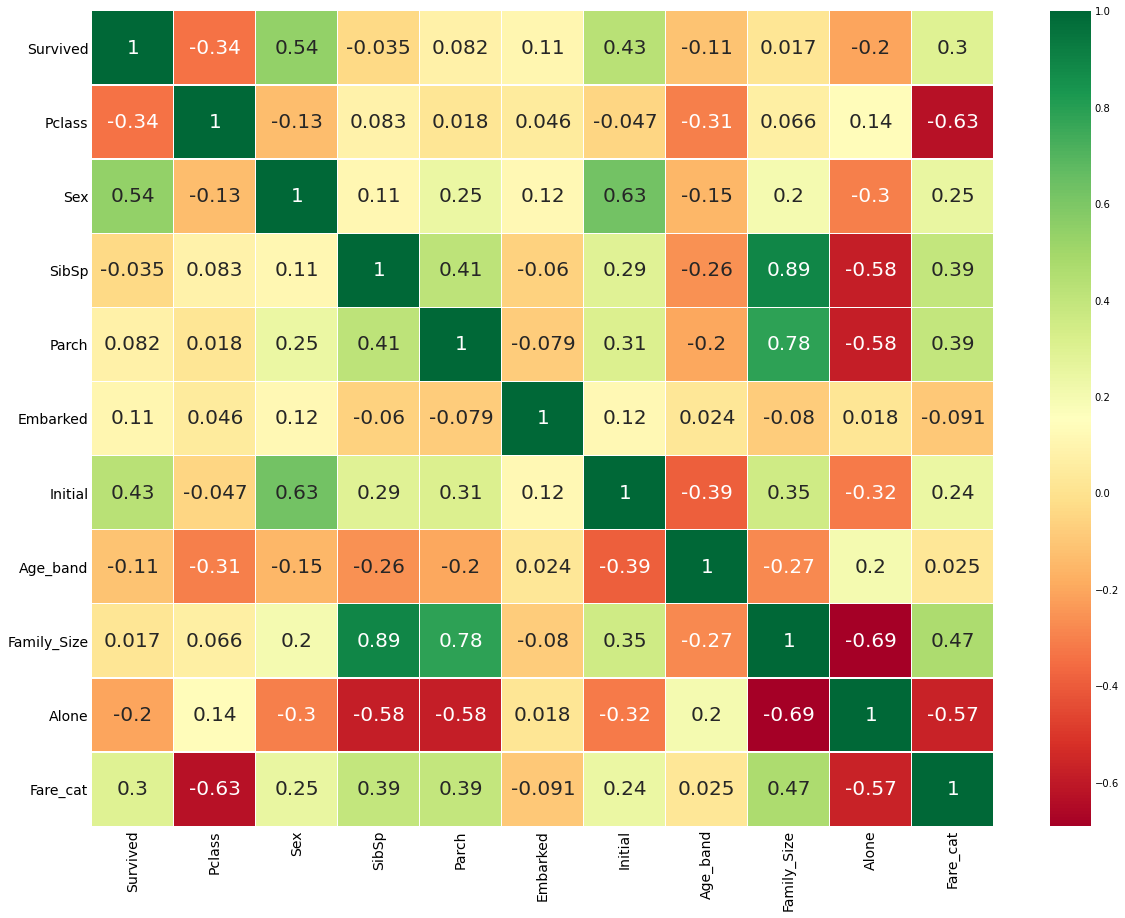

In [50]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
# annot_kws={'size':20} # 히트맵 상자안의 숫자 글꼴 크기
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

이제 위의 상관 관계 플롯에서 우리는 양의 상관이 있는 몇 가지 피쳐들을 볼 수 있습니다.
그중에는 SibSp와 Family_Size, Parch와 Family_Size가 양의 상관이고 Alone와 Family_Size 같이 일부 음의 관계인 피쳐가 있습니다.

## Part3: Predictive Modeling
우리는 EDA 부분에서 몇 가지 혜안을 얻었습니다.
그러나 그것만으로 승객이 살아남을 것인지 죽을 것인지 정확하게 예측하거나 말할 수 없습니다.
이제 우리는 훌륭한 분류 알고리즘을 사용하여 승객이 생존할지 여부를 예측할 것입니다.
다음은 모델을 만드는데 사용할 알고리즘입니다.

1) 로지스틱 회귀

2) 서포트 벡터 머신 (선형 및 방사형)

3) 랜덤 포레스트

4) K-최근접 이웃

5) 나이브 베이즈

6) 의사 결정 트리

7) 로지스틱 회귀

In [51]:
# importing all the required ML packages
from sklearn.linear_model import LogisticRegression # logistic regression
# 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법
from sklearn import svm # support vector Machine
# 분류를 위한 기준선을 정의하는 모델이다
from sklearn.ensemble import RandomForestClassifier # Random Forest
# 훈련 과정에서 구성한 다수의 결정 트리로부터 부류(분류) 또는 평균 예측치(회귀 분석)를 출력
from sklearn.neighbors import KNeighborsClassifier # KNN
# 새로운 데이터를 입력 받았을 때 가장 가까이 있는 것이 무엇인가를 중심으로 새로운 데이터의 종류를 정해주는 알고리즘
from sklearn.naive_bayes import GaussianNB #Naive bayes
# 특성들 사이의 독립을 가정하는 베이즈 정리를 적용한 확률 분류기
from sklearn.tree import DecisionTreeClassifier # Decision Tree
# 한 단계 이상의 복잡한 조건으로 구성된 문제를 해결하기 위하여 각 조건과 해결 방안을 선택적 구조로 나타낸 트리.
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics # accuracy measure(정확도)
from sklearn.metrics import confusion_matrix
# for confusion matrix : 머신러닝이 얼마나 잘 예측하는지 나타내주는 행렬

In [52]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])# train_test[:1]]_split(data, # data를 train, test로 나눔
# train_test_split(data, #
# test_size=0.3, # 테스트 데이터 셋의 비율=0.3
# random_state=0, # seed 넘버
# stratify=data['Survived']) # 지정한 데이터 비율을 data['Survived']으로 유지

train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### 방사형 서포트 벡터 머신 (rbf-SVM)

In [53]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
# svm.SVC( # SVM
# kernel='rbf', # 커널트릭 사용(input data들을 특정 커널을 이용해서 새로운 output처럼 만들어내는 과정을 거친다.)
# C=1, # 여유변수
# gamma=0.1) # 커널 자체에 대한 파라미터로, 가우시안 구(Gaussian sphere)같은, 훈련 샘플의 영향력을 증가시키는 등의 역할을 하는 파라미터 계수이다.
# 감마를 증가시키면 일반적으로 훈련 샘플의 영향력이 증가하고, 결정경계가 더욱 부드러워지게 된다.

model.fit(train_X,train_Y) # 모델 학습
prediction1=model.predict(test_X) # 예측값 출력
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y)) # 예측값의 정확도 출력

Accuracy for rbf SVM is  0.835820895522388


### 선형 서포트 벡터 머신 (linear-SVM)

In [54]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### 로지스틱 회귀

In [55]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### 의사 결정 트리

In [56]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


### K-Nearest Neighbours (KNN) 

In [57]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


이제 n_neighbors 속성 값을 변경하면 KNN 모델의 정확도가 변경됩니다.
기본값은 5입니다. n_neighbors의 다양한 값에 대한 정확도를 확인합니다.

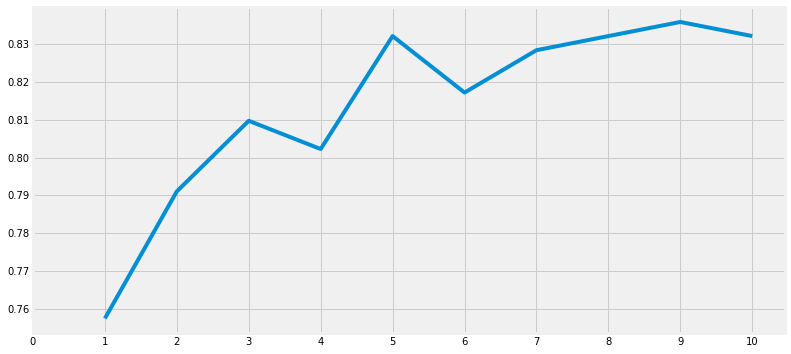

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [58]:
a_index=list(range(1,11)) # 1부터 10까지 list 생성
a=pd.Series() # 출력 값을 넣을 Series 생성
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) # KNN 이웃수 조절 (K=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y))) # 출력값 a에 저장
plt.plot(a_index, a) # 그래프 출력
plt.xticks(x) # x축 설정
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())
# 각각의 K값의 변화에 따른 정확도를 나타내고 이때의 최댓값도 출력

### 가우스 나이브 베이즈

In [59]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### 랜덤 포레스트

In [60]:
# 랜덤 포레스트
model=RandomForestClassifier(n_estimators=100) # 결정트리의 개수 100개로 지정
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8097014925373134


모델의 정확도만이 분류기의 강고함을 결정하는 요인은 아닙니다.
분류기가 훈련 데이터에 대해 훈련되고 테스트 데이터에 대해 테스트되고 90%의 정확도를 기록한다고 가정해보겠습니다.

이제 이것은 분류기에게 매우 좋은 정확도를 보이지만,
다가오는 모든 새로운 테스트 세트에 대해 90%가 될 것임을 확인할 수 있습니까??
대답은 아니오입니다.
우리는 분류기가 자신을 훈련하는데 어떤 모든 경우들을 사용하는지 결정할 수 없기 때문입니다.
훈련 및 테스트 데이터가 변경되면 정확도도 변경됩니다.
정확도는 증가하거나 감소할 수 있습니다.
이를 모델 분산이라고합니다.

이를 극복하고 일반화된 모델을 얻기 위해 교차 검증을 사용합니다.

## Cross Validation
많은 경우에서 데이터는 불균형합니다.
즉, class1 인스턴스(경우)의 수가 많지만 다른 클래스의 인스턴스의 수가 적을 수 있습니다.
따라서 데이터 세트의 모든 인스턴스에 대해 알고리즘을 훈련하고 테스트해야합니다.
그런 다음 데이터 세트에 대해 기록된 모든 정확도의 평균을 구할 수 있습니다.

1) K-Fold Cross Validation은 먼저 데이터 세트를 k-subset으로 나누는 방식으로 작동합니다.

2) 데이터 세트를 (k = 5) 부분으로 나눈다고 가정해 보겠습니다.
    테스트를 위해 1개 부분을 따로 두고 4개 부분에 대한 알고리즘을 훈련합니다.

3) 각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 훈련하여 프로세스를 계속 진행합니다.
    정확도와 오류는 평균하여 알고리즘의 평균 정확도를 얻습니다.

이를 K-Fold Cross Validation이라고 합니다.

4) 알고리즘은 몇몇 훈련 데이터의 경우 데이터 세트에 대해 과소적합 될 수 있으며
    때로는 다른 훈련 세트의 데이터를 과적합할 수도 있습니다.
    따라서 교차 검증을 통해 일반화 된 모델을 얻을 수 있습니다.


In [62]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy") 
    # cross_val_score( # cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환
    # model,X,Y, # 분석모형, 독립변수 데이터, 종속변수 데이터
    # cv = kfold, # 교차검증 폴드수
    # scoring = "accuracy") # 성능 검증에 사용하는 함수는 정확도
    
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
print(new_models_dataframe2)

                      CV Mean       Std
Linear Svm           0.793471  0.047797
Radial Svm           0.828290  0.034427
Logistic Regression  0.805843  0.024061
KNN                  0.813783  0.041210
Decision Tree        0.805893  0.032537
Naive Bayes          0.801386  0.028999
Random Forest        0.814831  0.034068


<AxesSubplot:>

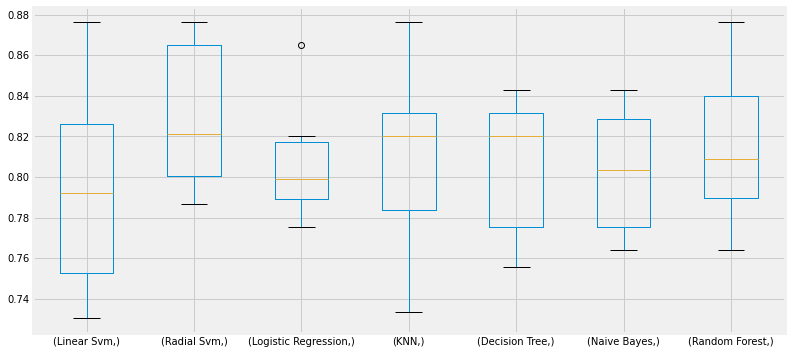

In [63]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

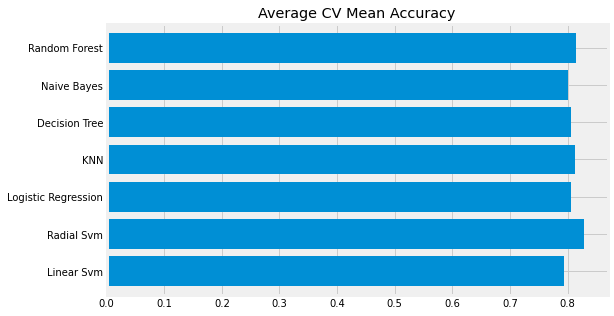

In [64]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8) 
# barh( # 가로막대 그래프
# width=0.8) # 막대의 폭

plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

불균형으로 인해 분류 정확도가 잘못 될 수 있습니다.
모델이 어디에서 잘못되었는지 또는 모델이 잘못 예측한 클래스를 보여주는 혼동 행렬의 도움으로 요약된 결과를 얻을 수 있습니다.

### Confusion Matrix

분류기가 만든 정확하고 부정확한 분류의 수를 제공합니다.

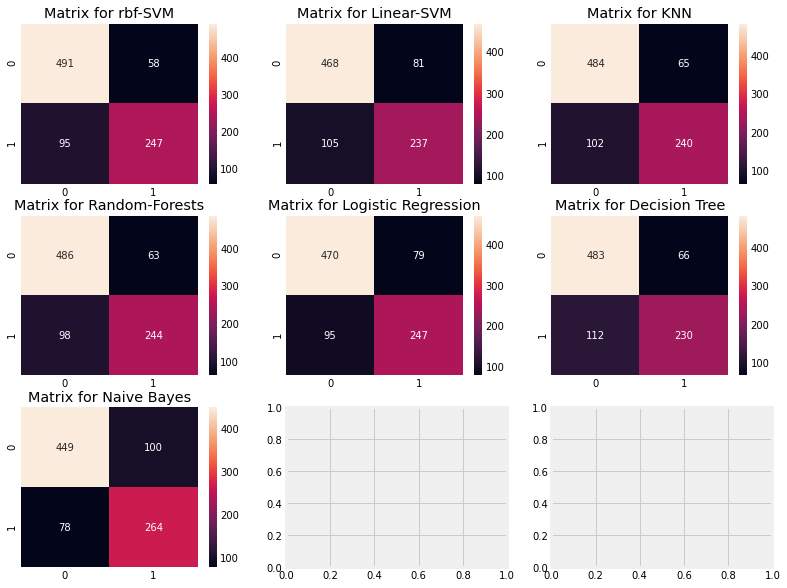

In [65]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
# cross_val_predict( # 각 테스트폴드에 대해 교차검증된 추정값 생성
# svm.SVC(kernel='rbf'), # 방사형 서포트 벡터 머신 (rbf-SVM)에 적용
# X,Y, # 적합데이터와 지도학습으로 예측할 표적변수
# cv=10) # 교차검증 폴드수
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
# confusion_matrix(Y,y_pred) # 오차행렬 구함
# fmt='2.0f' # 데이터 문자열 형식 설정
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Interpreting Confusion Matrix

왼쪽 대각선은 각 클래스에 대한 올바른 예측 수를 보여주고 오른쪽 대각선은 잘못된 예측 수를 보여줍니다.
rbf-SVM에 대한 첫 번째 플롯을 고려해 보겠습니다.

1) 정확한 예측의 수는 491(죽음의 경우) + 247(생존의 경우)이며 평균 CV 정확도는 (491 + 247) / 891 = 82.8 %입니다.

2) 오류 -> 58명의 사망자를 살아남은 것으로 잘못 분류하고 95명은 죽은 것으로 분류했습니다.
    따라서 죽은 것으로 예측하여 더 많은 실수를 저질렀습니다.

모든 행렬을 살펴보면 rbf-SVM은 사망한 승객을 정확하게 예측할 가능성이 더 높지만 NaiveBayes는 생존한 승객을 정확하게 예측할 가능성이 더 높다고 말할 수 있습니다.

### Hyper-Parameters Tuning
기계 학습 모델은 블랙 박스와 같습니다.
이 Black-Box에 대한 몇 가지 기본 매개 변수 값이 있으며 더 나은 모델을 얻기 위해 조정하거나 변경할 수 있습니다.
SVM 모델의 C 및 감마와 마찬가지로 서로 다른 분류기에 대해 유사하게 다른 매개 변수를 하이퍼 매개 변수라고하며,
알고리즘의 학습률을 바꾸고 더 나은 모델을 얻기 위해 조정할 수 있습니다.
이를 Hyper-Parameter Tuning이라고합니다.

SVM 및 RandomForest와 같은 두 가지 최고의 분류기에 대한 하이퍼 매개 변수를 조정합니다.

#### SVM

In [66]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
# GridSearchCV( # 교차검증을 가반으로 하이퍼 파라미터의 최적값을 찾아줌
# estimator=svm.SVC(), # 분류기 적용 
# param_grid=hyper, # 사용될 파리미터 값 지정
# verbose=True) # 설명추가

gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   23.4s finished


#### Random Forests

In [67]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   49.9s finished


0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


Rbf-SVM의 최고 점수는 C = 0.5, gamma = 0.1 일 때인 82.82%이고,
RandomForest는 n_estimators=900일 때인 81.9% 입니다.

## Ensembling

앙상블은 모델의 정확도와 성능을 높이기 위한 좋은 방법입니다.
간단한 말로, 하나의 강력한 모델을 만들기 위한 여러 단순한 모델의 조합입니다.

핸드폰을 사기 위해 많은 사람들에게 여러 파라미터에 대해 질문을 했다고 가정합시다.
그 후 우리는 모든 다른 파라미터들을 분석 한 뒤에 한 제품에 대한 강한 판단을 할 수 있을 것입니다.
이것이 모델의 안정성을 향상시켜주는 앙상블입니다.
앙상블은 다음의 방법으로 수행할 수 있습니다.

1) Voting Classifier

2) Bagging

3) Boosting

### Voting Classifier

Voting Classifier는 많고 다양한 단순한 학습 모델로부터 예측들을 결합하는 가장 단순한 방법입니다.
예측값은 각 서브모델 예측치의 평균치입니다. 각 서브모델들은 다 다른 유형의 모델입니다.


In [68]:
from sklearn.ensemble import VotingClassifier # 보팅 분류기 생성함수
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y) # 소프트 보팅 사용하여 학습
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


### Bagging

배깅은 일반적인 앙상블 방법입니다.
데이터셋의 작은 파티션에 대해 유사한 분류기들을 적용하고,
모든 예측치에 대한 평균을 적용함으로써 작용합니다.
평균화를 통해 분산이 감소됩니다.
Voting Classifier와는 달리 배깅은 유사한 분류기를 사용합니다.

#### Bagged KNN

배깅은 분산이 높은 모델에 가장 잘 작용합니다. 그 예는 Decision Tree나 Random Forests 입니다.
우리는 n_neighbor의 작은 값을 적용하여 KNN을 n_neighbors의 작은 값으로 사용해보겠습니다.


In [69]:
from sklearn.ensemble import BaggingClassifier # 배깅 분류기 생성함수
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


#### Bagged DecisionTree

In [70]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting

부스팅은 분류기의 순차적인 학습을 이용한 앙상블 기법입니다.
순차적으로 약한 모델을 향상시켜나갑니다.
부스팅은 아래와 같이 작동합니다 :

모델은 처음 전체 데이터셋에 대해 학습합니다.
이 때 모델은 일부 객체는 올바르게, 일부 객체는 틀리게 예측할 것입니다.
그 다음 시행에서, 틀리게 예측한 객체에 더욱 가중치를 두어 학습합니다.
결과적으로 틀리게 예측한 객체를 올바르게 예측하려고 노력합니다.
이런 과정이 반복되면서, 정확도가 한계에 도달할 때까지 새 분류기가 모델에 추가됩니다.

#### AdaBoost (Adaptive Boosting)

이번 케이스에서 약한 학습기는 Decision Tree입니다.
하지만 우리는 기본 base_estimator를 우리의 선택에 따라 다른 알고리즘으로 바꿀수 있습니다.

In [71]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting

이번에도 약한 학습기는 Decision Tree 입니다.

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())


The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [73]:
!pip install xgboost
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


AdaBoost가 가장 높은 정확도를 기록했습니다.
이 정확도를 하이퍼파라미터 튜닝을 통해 더 높여보겠습니다.

#### Hyper-Parameter Tuning for AdaBoost

In [74]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 11.7min finished


AdaBoost의 정확도는 n_estimator가 200, learning_rate = 0.05일 때 83.16%로 가장 높았습니다.

#### Confusion Matrix for the Best Model

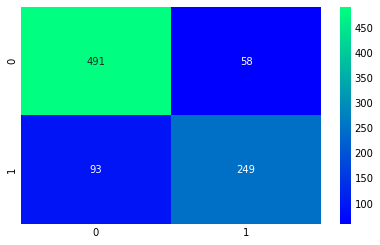

In [75]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()


#### Feature Importance

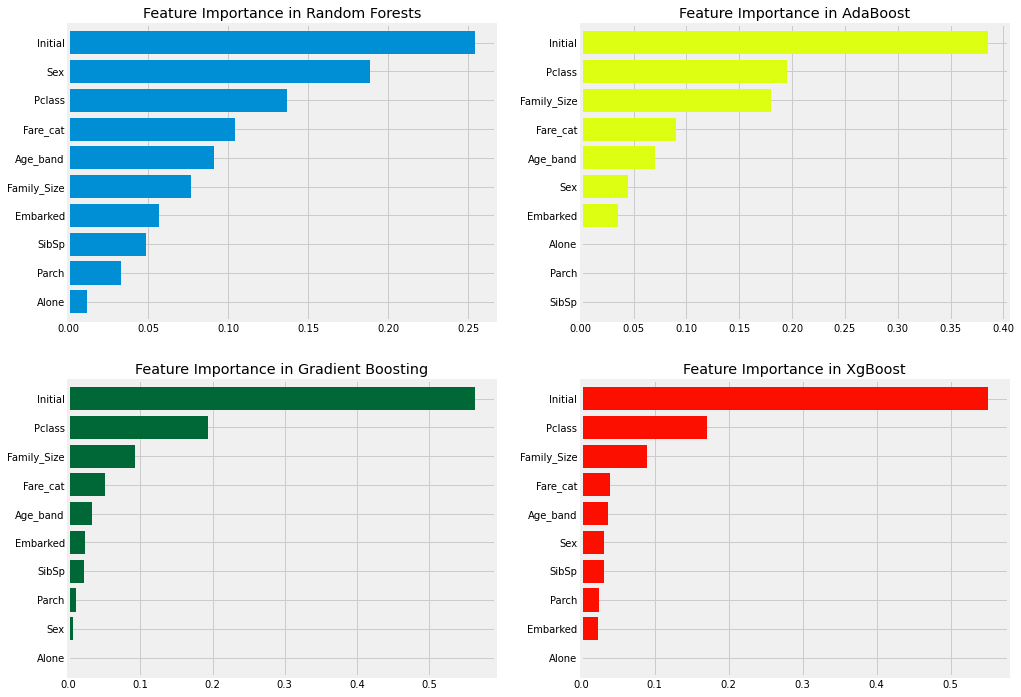

In [76]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
# pd.Series( # Series 생성
# model.feature_importances_, X.columns). # X열을 기준으로 model의 피쳐중요도를 나타냄
# sort_values(ascending=True). # 중요도 값 순으로 Series를 정렬
# plot.barh(width=0.8,ax=ax[0,0]) # 막대그래프 작성 및 크기 조절
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

Random Forest, AdaBoost 등 여러 모델들에 대한 feature importance를 볼 수 있습니다.

#### Observations : 
1) 공통적으로 중요한 feature는 Initial ,Fare_cat, Pclass, Family_Size 입니다.

2) Sex는 그렇게 중요도가 높지 않았는데,
    앞선 분석에서 Pclass와 함께 보았을 때 성별이 중요한 요소였던 것을 생각하면 놀라운 결과입니다.
    성별은 Random Forest 모델에서만 중요해보입니다.

하지만 많은 분류기의 최상단에 있는 Initial은 Sex과 양의 상관관계에 있습니다.
결국, 두 정보 모두 성별에 대한 정보를 담고 있습니다.

3) 이와 비슷하게 Pclass와 Fare_cat 모두 탑승객의 지위와 Family_Size, Alone, Parch, SibSp의 정보를 담고 있습니다.

여러분 모두가 기계 학습에 대한 통찰력을 얻었기를 바랍니다.
기계 학습을위한 다른 훌륭한 노트북은 다음과 같습니다.

1) For R : Divide and Conquer by Oscar Takeshita

2) 파이썬 : Pytanic by Heads and Tails

3) Python의 경우 : 이방성에 의한 앙상블 링 / 스태킹 소개

이 노트북을 봐 주셔서 감사합니다. 이 노트가 유용하다고 생각되면 Do Upvote.


출처 https://www.kaggle.com/ash316/eda-to-prediction-dietanic